 <img src='ni_band.jpg'>
 <br>
 Data je slika *ni_band.jpg* čije su dimenzije 570 x 291 piksela.

In [306]:
import numpy as np
from PIL import Image
from scipy import ndimage
from matplotlib import pyplot as plt

**a)** Učitati zadatu sliku, a zatim korišćenjem PIL biblioteke napraviti od nje sliku *ni_small_band.jpg* čije su dimenzije 3 puta manje i koja je zarotirana za 180 stepeni. 

In [307]:
img = Image.open('./ni_band.jpg')

In [308]:
new_size = (img.size[0]//3, img.size[1]//3)
new_size

(190, 97)

In [309]:
target_img = img.rotate(180).resize(new_size)

**b)** Učitati zadatu sliku, a zatim je korišćenjem PIL biblioteke prebaciti u crno-beli mod. Primeniti filter određen kernelom
<br>
$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & 0 & 0 \\
0 & -1 & 5 & -1 & 0 \\
0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 
\end{bmatrix}
$$ 
Kakav efekat se postiže?

In [310]:
img = Image.open('./ni_band.jpg')
img = img.convert('L')

In [311]:
kernel = np.zeros((5, 5))
kernel[1, 2] = -1
kernel[3, 2] = -1
kernel[2, 1] = -1
kernel[2, 3] = -1
kernel[2, 2] = 5
kernel

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  5., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [312]:
kernelized_image = ndimage.convolve(img, kernel)

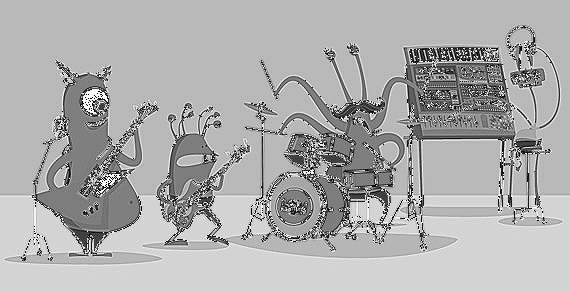

In [313]:
pil_kernelized_image = Image.fromarray(kernelized_image)
pil_kernelized_image

**c)** Učitati zadatu sliku, korišćenjem PIL biblioteke prebaciti je crno-beli mod, a zatim primeniti 2D Furijeovu transformaciju i eliminisati iz frekvencijskog spektra frekvencije koje se nalaze u donjem levom i gornjem desnom uglu u pravougaoniku dimenzija 200 x 150. Prikazati rezultujuću sliku. Kakav efekat se postiže?

In [314]:
img = Image.open('./ni_band.jpg').convert('L')

In [315]:
c = np.fft.fft2(img)

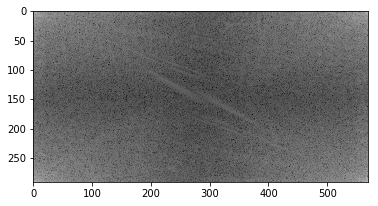

In [316]:
plt.imshow(20*np.log(np.abs(c)), cmap='gray')

### Shift
Cesce zelimo da se vrednost koeficijenta f(0, 0) nadje u centru slike.

In [317]:
c_shifted = np.fft.fftshift(c)

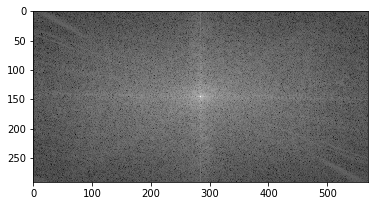

In [318]:
plt.imshow(20*np.log(np.abs(c_shifted)), cmap='gray')

# Zamucivanje slike

In [319]:
# Pretvaramo sliku u numpy matricu
npimg = np.array(img)
print("Dimenzije slike: {}".format(npimg.shape))

Dimenzije slike: (291, 570)


In [320]:
# Trazimo koordinate centra slike
x_center = npimg.shape[0] // 2
y_center = npimg.shape[1] // 2
print("x_center = {}\ny_center = {}".format(x_center, y_center))

x_center = 145
y_center = 285


In [321]:
number_of_ones = 50
# Pravimo masku iste velicine
mask = np.zeros(npimg.shape)

# U masku upisujemo jedinice u delu koji zelimo da zadrzimo
mask[x_center - number_of_ones : x_center + number_of_ones,\
     y_center - number_of_ones : y_center + number_of_ones] = 1

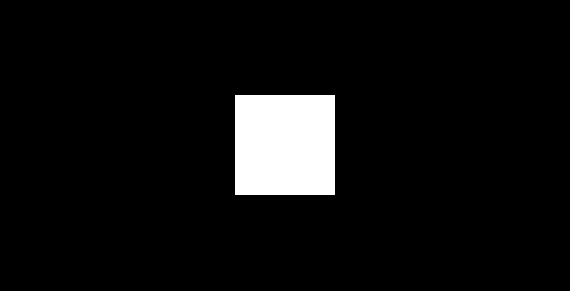

In [322]:
# Ilustracija maske
tmp = Image.fromarray(mask * np.full(mask.shape, 255)).convert('L')
tmp

In [323]:
# Primenjujemo masku -> odsecamo deo frekvencija (sustinski deo koda)
c_shifted_filtered = c_shifted * mask

In [324]:
# transliramo nazad
c_filtered = np.fft.ifftshift(c_shifted_filtered)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


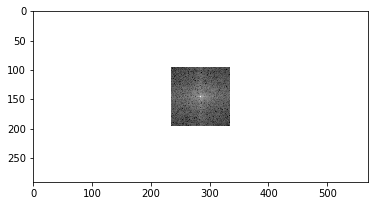

In [325]:
plt.imshow(20*np.log(np.abs(c_shifted_filtered)), cmap='gray')

In [326]:
# Vrsimo inverzju f transformaciju
c_final = np.fft.ifft2(c_filtered)

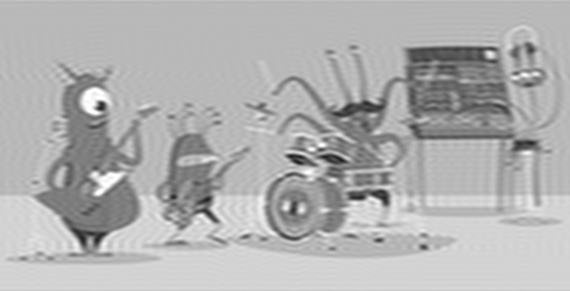

In [327]:
# Prikazujemo sliku
blured_image = Image.fromarray(np.abs(c_final)).convert('L')
blured_image

c) Učitati zadatu sliku, korišćenjem PIL biblioteke prebaciti je crno-beli mod, a zatim primeniti 2D Furijeovu transformaciju i eliminisati iz frekvencijskog spektra frekvencije koje se nalaze u donjem levom i gornjem desnom uglu u pravougaoniku dimenzija 200 x 150. Prikazati rezultujuću sliku. Kakav efekat se postiže?

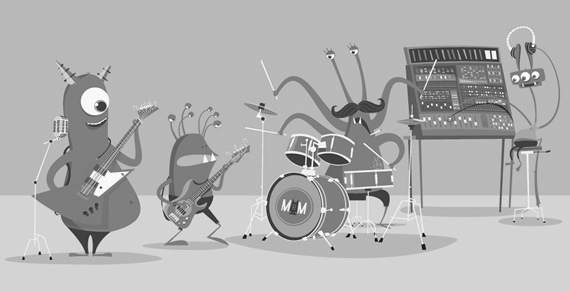

In [328]:
original_img = Image.open('./ni_band.jpg').convert('L')
original_img

In [329]:
img = np.array(original_img)

In [330]:
img.shape

(291, 570)

In [331]:
mask = np.ones(img.shape)
h = 200
w = 150
putme = np.zeros((h, w))
mask[-h:, :w] = putme
mask[:h, -w:] = putme

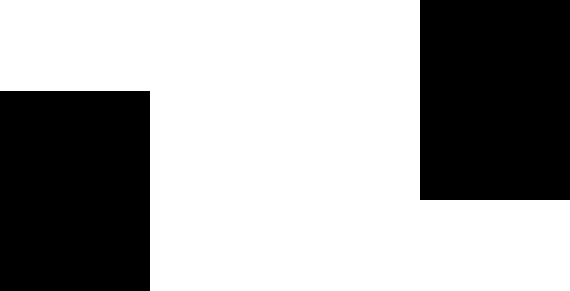

In [332]:
# Prikazujemo masku
img_mask = Image.fromarray(mask * np.full(mask.shape, 255)).convert('L')
img_mask

In [333]:
# FFT <3
c = np.fft.fft2(img)

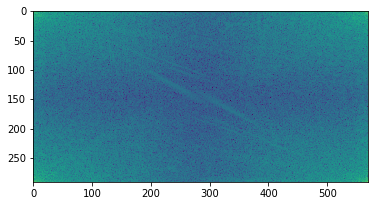

In [334]:
plt.imshow(20*np.log(np.abs(c)))

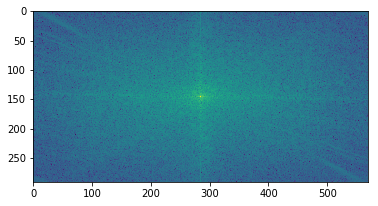

In [335]:
# Transliramo
c_shifted = np.fft.fftshift(c)
plt.imshow(20*np.log(np.abs(c_shifted)))

In [336]:
# Odsecamo potrebne frekvenciju
c_shifted_filtered = c_shifted * mask

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


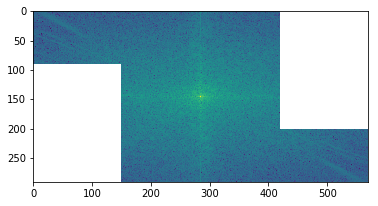

In [337]:
c_shifted = np.fft.fftshift(c)
plt.imshow(20*np.log(np.abs(c_shifted_filtered)))

In [338]:
c_filtered = np.fft.ifftshift(c_shifted_filtered)

In [339]:
c_final = np.fft.ifft2(c_filtered)

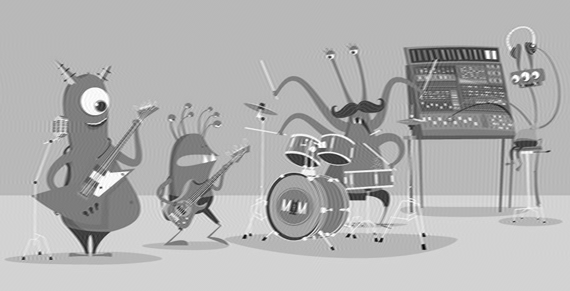

In [340]:
# Pravimo sliku i prikazujemo je
the_solution = Image.fromarray(np.abs(c_final)).convert('L')
the_solution

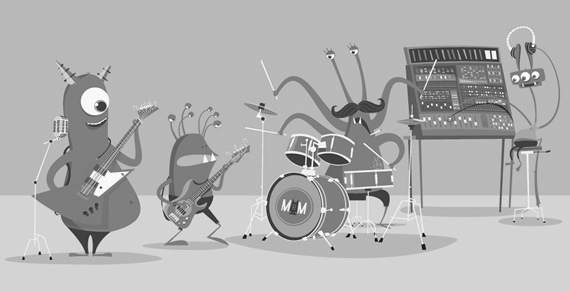

In [342]:
original_img